# ML-Kelompok5-3H-Ceria-Cepat-Cendikiawan

# Penjelasan dan jawaban dapat dilihat pada file [README](https://github.com/LeToyek/ML-Kelompok5-3H-Ceria-Cepat-Cendekiawan/blob/main/README.md)

# KUIS 1

<B>KELOMPOK 5</B>

    ANNGGOTA KELOMPOK:
        1. ABDUL BASITH BAHI                       | 2141720177
        2. BAGUS REZKY                             | 2141720210
        3. MUHAMMAD DZAKA MURRAN RUSID             | 2141720076
        4. MAULANA ARIF WIJAYA                     | 2141720085
        5. SELY RULI AMANDA                        | 2141720005

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import fetch_openml

In [2]:
mnist = datasets.fetch_openml("mnist_784")

Jumlah data setiap label:
Label 0: 6903 data
Label 1: 7877 data
Label 2: 6990 data
Label 3: 7141 data
Label 4: 6824 data
Label 5: 6313 data
Label 6: 6876 data
Label 7: 7293 data
Label 8: 6825 data
Label 9: 6958 data


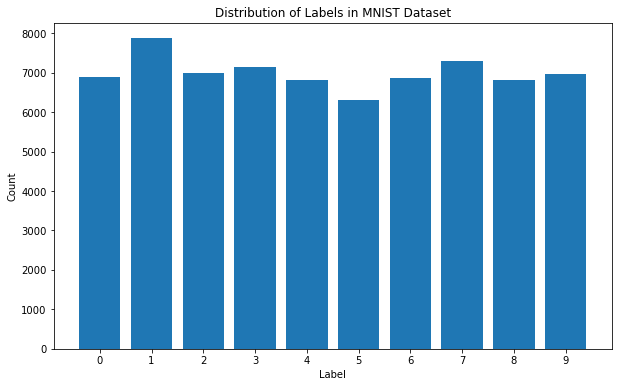

In [6]:
# 1. Eksplorasi Dataset
labels, counts = np.unique(mnist.target, return_counts=True)
print("Jumlah data setiap label:")
for label, count in zip(labels, counts):
    print(f"Label {label}: {count} data")

plt.figure(figsize=(10, 6))
plt.bar(labels, counts, tick_label=labels)

# Adding labels and title
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels in MNIST Dataset')

# Show the plot
plt.show()

In [7]:
import pandas as pd

# Data kelas Anda dalam bentuk dictionary
data = {
    'Label': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    'Jumlah Data': [6903, 7877, 6990, 7141, 6824, 6313, 6876, 7293, 6825, 6958]
}

# Membuat DataFrame dari data
df = pd.DataFrame(data)

# Menghitung total jumlah data
total_data = df['Jumlah Data'].sum()

# Menambahkan kolom "Persentase" yang berisi persentase distribusi
df['Persentase'] = (df['Jumlah Data'] / total_data) * 100

# Menampilkan DataFrame
print(df)

   Label  Jumlah Data  Persentase
0      0         6903    9.861429
1      1         7877   11.252857
2      2         6990    9.985714
3      3         7141   10.201429
4      4         6824    9.748571
5      5         6313    9.018571
6      6         6876    9.822857
7      7         7293   10.418571
8      8         6825    9.750000
9      9         6958    9.940000


In [9]:
import numpy as np

# Jumlah data setiap label
data_counts = [6903, 7877, 6990, 7141, 6824, 6313, 6876, 7293, 6825, 6958]

# Hitung deviasi standar
std_deviation = np.std(data_counts)

# Hitung ambang batas
batas = (0.05 * sum(data_counts))

# Menentukan apakah data seimbang atau tidak
if std_deviation < batas:  # Ini hanya contoh ambang batas yang dapat disesuaikan
    print("Data dianggap seimbang.")
else:
    print("Data dianggap tidak seimbang.")


Data dianggap seimbang.


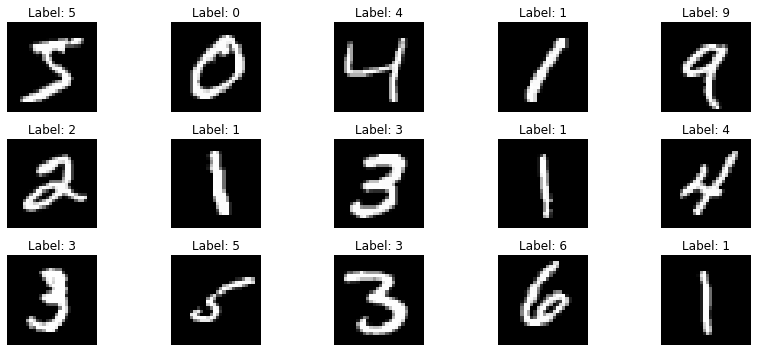

In [11]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

# Mengunduh dataset MNIST
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

# Mengambil data dan label
X = mnist.data
y = mnist.target

# Menampilkan 15 citra pertama berserta labelnya
plt.figure(figsize=(12, 5))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(X[i].reshape(28, 28), cmap='gray')
    plt.title(f'Label: {y[i]}')
    plt.axis('off')

plt.tight_layout()
plt.show()

## Klasifikasi Menggunakan Algoritma SVM

In [12]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler


## Scalling Dataset

In [13]:
scalling = MinMaxScaler()
X_scalling = scalling.fit_transform(X)

In [14]:
print(X_scalling[:5])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## Split Dataset menjadi 90:10

In [15]:
# pemisahan data training dan data testing dengan 80:20

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_scalling, y, test_size=0.1, random_state=42)

## Menerapkan PCA untuk Reduksi Dimensi Data

In [16]:
from sklearn.model_selection import GridSearchCV

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

## Mencari hyperparameter yang terbaik untuk menghasilkan kinerja model yang optimal

In [17]:
param_grid = {'svc__C': [1], 
              'svc__gamma': [0.001]}
grid_search = GridSearchCV(model, param_grid, cv=5) #mengombinasikan parameter dalam param_grid untuk model yg telah dibuat "model"
grid_search.fit(Xtrain, ytrain) #melatih model menggunakan GridSearchCV untuk melakukan kombinasi semua parameter dalam param_grid dgn menggunakan data pelatihan 'X_train' dan data label 'y_train'

In [22]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'svc__C': 1, 'svc__gamma': 0.001}
0.9479841269841269


In [16]:
model = grid_search.best_estimator_ #mengambil model terbaik dari hasil penelusuran hiperparameter
yfit = model.predict(Xtest) #membuat prediksi pada data uji 'X_test'

## Evaluasi Model

In [17]:
from sklearn.metrics import classification_report

target_names = [str(i) for i in range(10)]
print(classification_report(ytest, yfit, target_names=target_names))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       683
           1       0.97      0.98      0.97       800
           2       0.93      0.95      0.94       674
           3       0.93      0.93      0.93       760
           4       0.92      0.95      0.93       611
           5       0.94      0.93      0.93       658
           6       0.97      0.97      0.97       677
           7       0.96      0.94      0.95       724
           8       0.95      0.94      0.95       693
           9       0.95      0.93      0.94       720

    accuracy                           0.95      7000
   macro avg       0.95      0.95      0.95      7000
weighted avg       0.95      0.95      0.95      7000



Text(204.36, 0.5, 'predicted label')

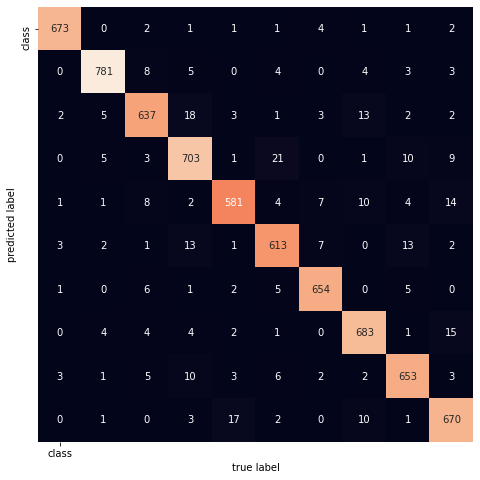

In [18]:
# bentuk confusion matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(ytest, yfit)

plt.figure(figsize=(12, 8))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=mnist.target_names,
            yticklabels=mnist.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

## Pelabelan Citra Data Testing

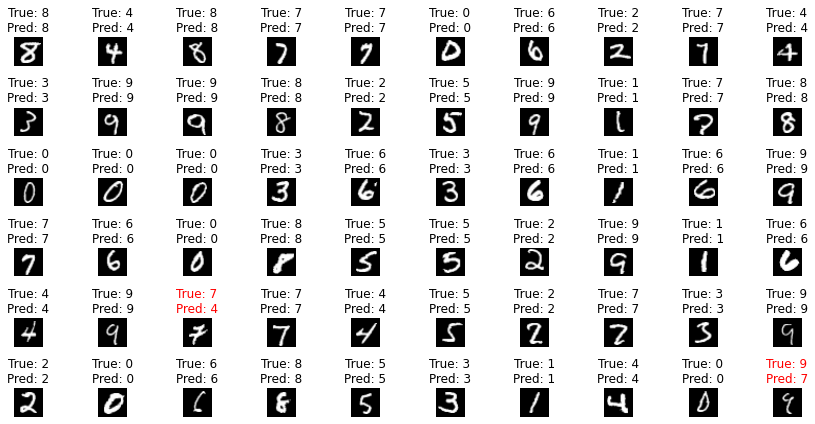

In [19]:
n_samples_to_display = 60
# Display images with true labels and predicted labels
plt.figure(figsize=(12, 6))
for i in range(n_samples_to_display):
    plt.subplot(6, 10, i + 1)
    plt.imshow(Xtest[i].reshape(28, 28), cmap="gray")

    # Determine text color based on true or predicted
    true_label = ytest.iloc[i] if isinstance(ytest, pd.Series) else ytest[i]
    pred_label = yfit.iloc[i] if isinstance(yfit, pd.Series) else yfit[i]

    if true_label == pred_label:
        text_color = 'black'
    else:
        text_color = 'red'

    plt.title(f"True: {true_label}\nPred: {pred_label}", color=text_color)
    plt.axis("off")

plt.tight_layout()
plt.show()

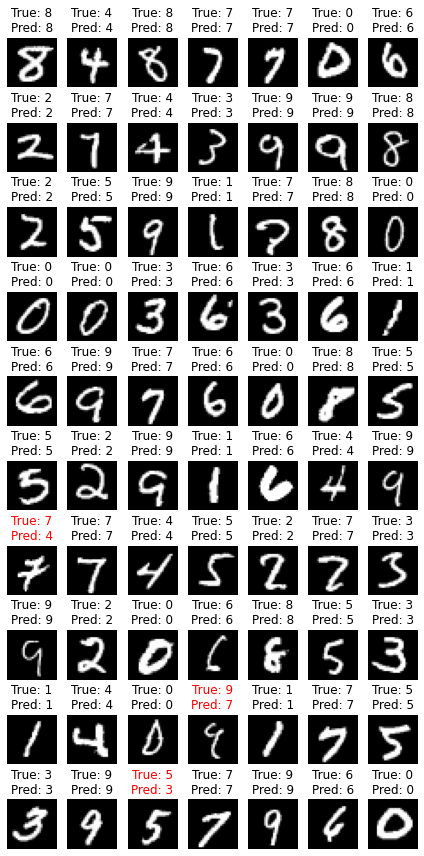

In [20]:
import pandas as pd

n_samples_to_display = 70
# Display images with true labels and predicted labels
plt.figure(figsize=(6, 12))
for i in range(n_samples_to_display):
    plt.subplot(10, 7, i + 1)
    plt.imshow(Xtest[i].reshape(28, 28), cmap="gray")

    # Determine text color based on true or predicted
    true_label = ytest[i] if isinstance(ytest, pd.Series) else ytest[i]
    pred_label = yfit[i] if isinstance(yfit, pd.Series) else yfit[i]

    if true_label == pred_label:
        text_color = 'black'
    else:
        text_color = 'red'

    plt.title(f"True: {true_label}\nPred: {pred_label}", color=text_color)
    plt.axis("off")

plt.tight_layout()
plt.show()